# Import stuff

In [3]:
import qutip as qt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import Image
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Defining some functions

In [13]:
def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for a Harmonic oscillator mode
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1,1,figsize=(8,8))
        
    if qt.isket(rho):
        rho = qt.ket2dm(rho)
        
    xvec = np.linspace(-5, 5, 200)
    
    W = qt.wigner(rho, xvec, xvec)
    wlim = np.abs(W).max()
    
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap("RdYlBu"))
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    
    return ax

def plot_wigner_3D(rho):        
    if qt.isket(rho):
        rho = qt.ket2dm(rho)
    
    xvec = np.linspace(-7.5, 7.5, 200)
    
    W = qt.wigner(rho, xvec, xvec)
    X, Y = np.meshgrid(xvec, xvec)
    wlim = np.abs(W).max()
    
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.view_init(50, 30)
    ax.plot_surface(X, Y, W, norm=mpl.colors.Normalize(-wlim,wlim),  cmap=mpl.cm.get_cmap("RdYlBu"))
    
    return ax

# Some nice plots

## Vacuum

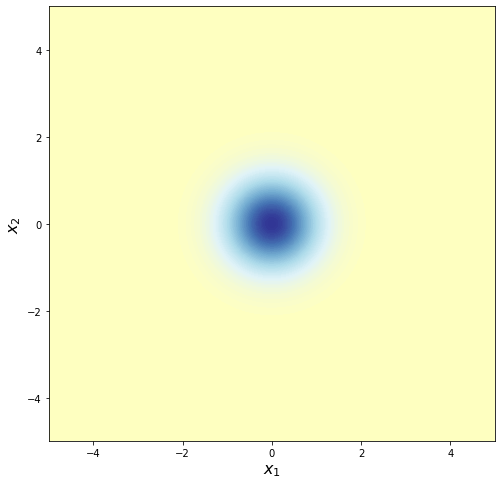

In [15]:
plot_wigner(qt.basis(10, 0))

## Coherent state

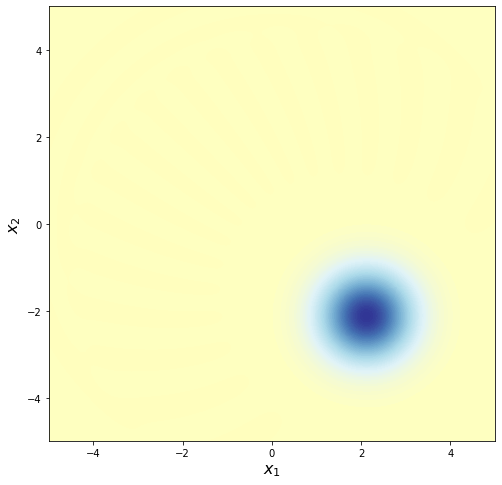

In [16]:
plot_wigner(qt.coherent(20, 1.5 - 1.5J, method="analytic"))

## Quadrature-squeezed state

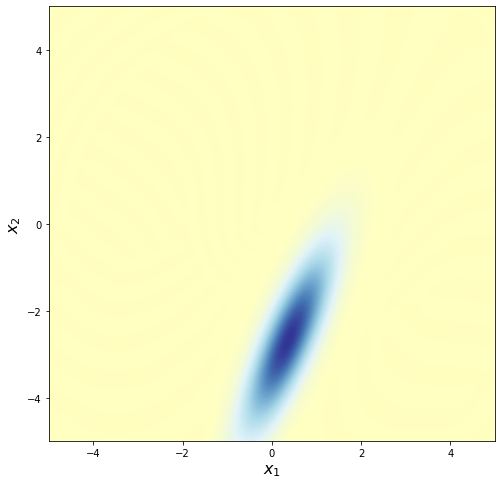

In [17]:
plot_wigner(qt.squeeze(30, 0.5-0.5J) * qt.coherent(30, 1.5-1.5J, method="analytic"))

## Fock state

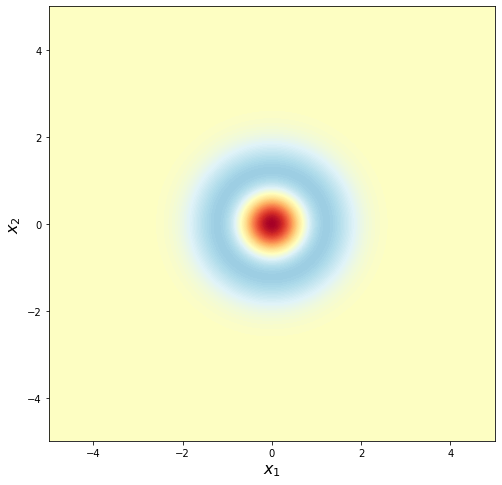

In [18]:
plot_wigner(qt.basis(10, 1))

<IPython.core.display.Javascript object>


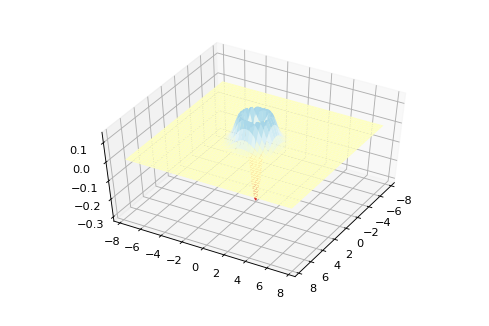

In [21]:
%matplotlib notebook
plot_wigner_3D(qt.basis(10, 1))

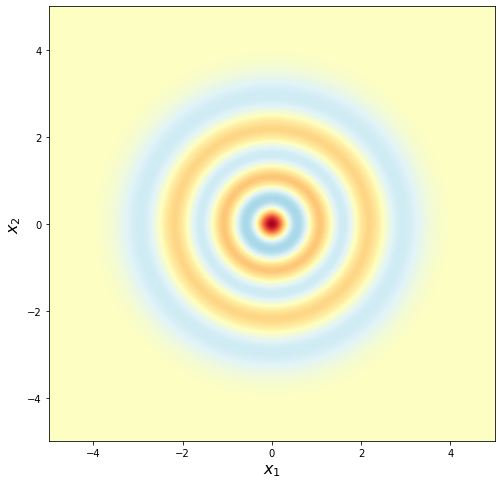

In [22]:
%matplotlib inline
plot_wigner(qt.basis(10, 5))

## Phase state

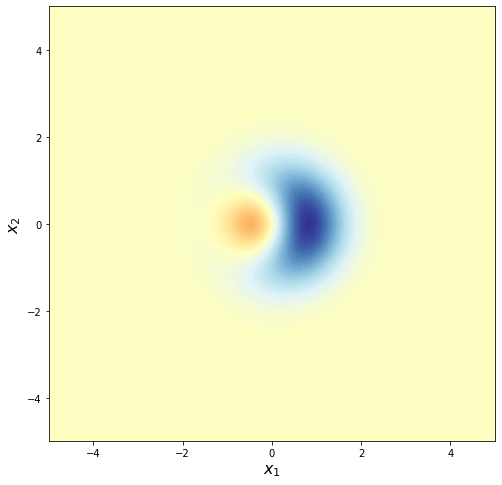

In [14]:
%matplotlib inline
plot_wigner((qt.basis(10, 0) + qt.basis(10, 1))/np.sqrt(2))

# Fig9

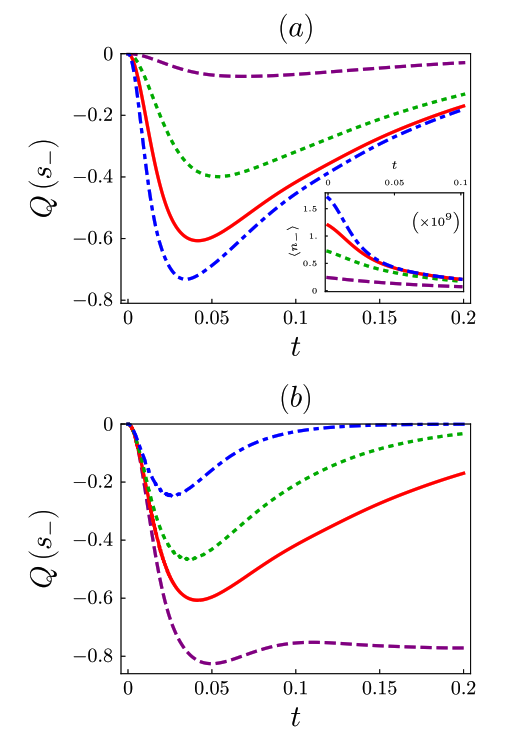

In [10]:
Image( "PhoG-fig9.png")

# Animations

## Kerr hamiltonian

In [28]:
vidfile = open("kerr.html", "r")
HTML(vidfile.read())

In [27]:
vidfile = open("kerr_lossy.html", "r")
HTML(vidfile.read())

## Phase state (two-photon loss)

In [5]:
vidfile = open("twophoton_loss.html", "r")
HTML(vidfile.read())

## PhoG state)

In [6]:
vidfile = open("NC_loss.html", "r")
HTML(vidfile.read())

In [25]:
vidfile = open("NC_loss-and-linear_loss-and_two_photon_loss.html", "r")
HTML(vidfile.read())